In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prospect.models import priors_beta as pb
from prospect.models import transforms as ts
import lbg_forecast.population_model as pop
import lbg_forecast.sfh as sfh
import lbg_forecast.cosmology as cosmo

SEE LINES 1665 TO 1670 IN https://github.com/bd-j/prospector/blob/main/prospect/models/priors_beta.py#L367

THIS LOOKS LIKE HOW THEY CALCULATE THE SFR BEFORE CONVERTING IT INTO RATIOS!!
SO COULD USE THIS TO REPRODUCE FIGURES IN PAPER???

    nsfrbins = agebins_shifted.shape[0]
    sfr_shifted = np.zeros(nsfrbins)
    for i in range(nsfrbins):
        a = agebins_shifted[i,0]
        b = agebins_shifted[i,1]
        sfr_shifted[i] = spl_tl_sfrd.integral(a=a, b=b)/(b-a)


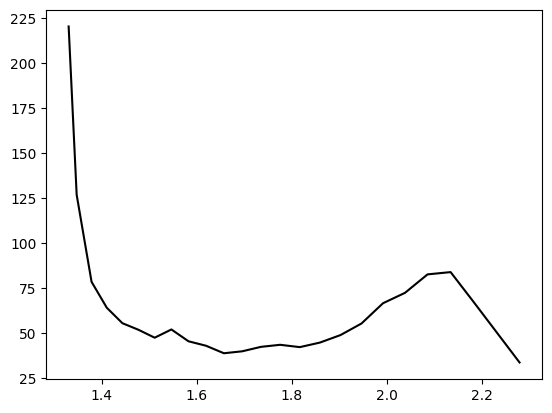

In [239]:
z = 1
m = 11.5
nu = 2.0
sigma = 0.3
nsamples = 1000
tuniv = cosmo.get_wmap9().age(z).value

#exp_logsfr_ratios = pb.expe_logsfr_ratios(z, m, -5, 5)
#
#nsfrs = len(exp_logsfr_ratios)
#all_log_sfr_ratios = []

#for sfrs in range(nsfrs):
#    all_log_sfr_ratios.append(pop.sample_truncated_t(nsamples, nu, exp_logsfr_ratios[sfrs], sigma))

#all_log_sfr_ratios = np.hstack(all_log_sfr_ratios)
#all_log_sfr_ratios = pb.DymSFH(zred_mini=z-1e-3, zred_maxi=z+1e-3, mass_mini=m-1e-3, mass_maxi=m+1e-3,
#                    z_mini=-1, z_maxi=0,
#                    logsfr_ratio_mini=-5.0, logsfr_ratio_maxi=5.0,
#                    logsfr_ratio_tscale=0.3, nbins_sfh=7,
#                    const_phi=True).sample()[3:]

#print(all_log_sfr_ratios)

nbins=24
ages = np.logspace(np.log10(1e6), np.log10(cosmo.get_wmap9().age(0).value*1e9), nbins+1)
age_bins = np.log10(np.array([ages[:-1], ages[1:]]).T)
#age_bins
#age_bins = sfh.default_agebins()
new_age_bins = np.log10(pb.z_to_agebins_rescale(z, nbins))#sfh.zred_to_agebins_pbeta(z, age_bins)

ssfrs = np.zeros(nbins, dtype='float64')
for indx in range(nsamples):

    all_log_sfr_ratios = pb.NzSFH(zred_mini=z-1e-3, zred_maxi=z+1e-3, mass_mini=m-1e-3, mass_maxi=m+1e-3,
                    z_mini=-0.01, z_maxi=0,
                    logsfr_ratio_mini=-5.0, logsfr_ratio_maxi=5.0,
                    logsfr_ratio_tscale=0.3, nbins_sfh=nbins,
                    const_phi=False).sample()[3:]

    sfrs = ts.logsfr_ratios_to_sfrs(m, all_log_sfr_ratios, new_age_bins)
    #masses = sfh.logsfr_ratios_to_masses(m, all_log_sfr_ratios, new_age_bins)
    #tabulatedsfh = sfh.convert_sfh(new_age_bins, masses, epsilon=1e-4)
    #times = tuniv-tabulatedsfh[0]
    ssfrs+=sfrs#/(10**m)
    #plt.plot((10**new_age_bins[:, 1]/10**9)/tuniv, sfrs, color="purple", alpha=0.1)

plt.plot((10**new_age_bins[:, 1]/10**9)/tuniv, ssfrs/nsamples, color="black", alpha=1)
#plt.yscale("log")
#plt.xscale("log")
#plt.xlim(7e-3, 10)


In [218]:
pb.DymSFH(zred_mini=z-1e-3, zred_maxi=z+1e-3, mass_mini=m-1e-3, mass_maxi=m+1e-3,
                    z_mini=-0.01, z_maxi=0,
                    logsfr_ratio_mini=-5.0, logsfr_ratio_maxi=5.0,
                    logsfr_ratio_tscale=0.3, nbins_sfh=nbins,
                    const_phi=False).sample()[3:].shape

(23,)

In [222]:
10**new_age_bins

array([[1.00000000e+00, 2.99999133e+07],
       [2.99999133e+07, 1.00000000e+08],
       [1.00000000e+08, 1.20844010e+08],
       [1.20844010e+08, 1.46032747e+08],
       [1.46032747e+08, 1.76471826e+08],
       [1.76471826e+08, 2.13255631e+08],
       [2.13255631e+08, 2.57706655e+08],
       [2.57706655e+08, 3.11423055e+08],
       [3.11423055e+08, 3.76336107e+08],
       [3.76336107e+08, 4.54779641e+08],
       [4.54779641e+08, 5.49573954e+08],
       [5.49573954e+08, 6.64127202e+08],
       [6.64127202e+08, 8.02557940e+08],
       [8.02557940e+08, 9.69843194e+08],
       [9.69843194e+08, 1.17199740e+09],
       [1.17199740e+09, 1.41628865e+09],
       [1.41628865e+09, 1.71150000e+09],
       [1.71150000e+09, 2.06824522e+09],
       [2.06824522e+09, 2.49935046e+09],
       [2.49935046e+09, 3.02031531e+09],
       [3.02031531e+09, 3.64987012e+09],
       [3.64987012e+09, 4.41064940e+09],
       [4.41064940e+09, 5.33000559e+09],
       [5.33000559e+09, 5.92222843e+09]])

In [233]:
pb.z_to_agebins_rescale(1, nbins)

array([[7.84667069e+09, 7.87667069e+09],
       [7.87667069e+09, 7.97667069e+09],
       [7.97667069e+09, 8.16231007e+09],
       [8.16231007e+09, 8.35226980e+09],
       [8.35226980e+09, 8.54665042e+09],
       [8.54665042e+09, 8.74555482e+09],
       [8.74555482e+09, 8.94908828e+09],
       [8.94908828e+09, 9.15735853e+09],
       [9.15735853e+09, 9.37047581e+09],
       [9.37047581e+09, 9.58855292e+09],
       [9.58855292e+09, 9.81170530e+09],
       [9.81170530e+09, 1.00400511e+10],
       [1.00400511e+10, 1.02737111e+10],
       [1.02737111e+10, 1.05128090e+10],
       [1.05128090e+10, 1.07574714e+10],
       [1.07574714e+10, 1.10078277e+10],
       [1.10078277e+10, 1.12640106e+10],
       [1.12640106e+10, 1.15261556e+10],
       [1.15261556e+10, 1.17944014e+10],
       [1.17944014e+10, 1.20688900e+10],
       [1.20688900e+10, 1.23497667e+10],
       [1.23497667e+10, 1.26371802e+10],
       [1.26371802e+10, 1.29312827e+10],
       [1.29312827e+10, 1.34962396e+10]])